# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd

%matplotlib inline

#!pip install xlrd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


In [4]:
df.shape

(1653, 30)

In [5]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [6]:
df[['name', 'networthusbillion']].head(10).sort_values(by='networthusbillion', ascending=False)

,name,networthusbillion
5,Abigail Johnson,17.3
2,Abdulla bin Ahmad Al Ghurair,4.8
8,Adi Godrej,3.5
6,Abilio dos Santos Diniz,2.8
0,A. Jerrold Perenchio,2.6
1,Abdulla Al Futtaim,2.5
3,Abdullah Al Rajhi,2.4
7,Achmad Hamami,1.6
4,Abdulsamad Rabiu,1.2
9,Aerin Lauder Zinterhofer,1.1


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

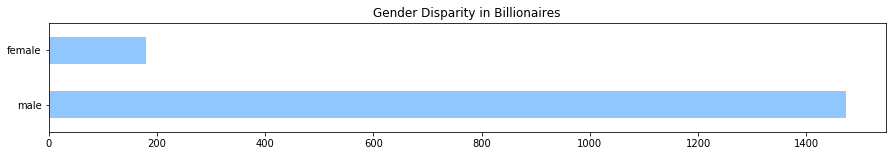

In [7]:
# How many male billionaires are there compared to the number of female billionares?
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

df.gender.value_counts().plot(kind='barh', title='Gender Disparity in Billionaires', figsize=(15,2))

In [8]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [9]:
# What percent is that?
df.gender.value_counts('male')*100

male      89.110708
female    10.889292
Name: gender, dtype: float64

In [10]:
# Do they have a different average wealth?
df.groupby(by='gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [11]:
df.groupby(by='typeofwealth').count()['year'].sort_values(ascending=False) / df.year.count() * 100,1

(typeofwealth
 inherited                   30.611010
 founder non-finance         28.251664
 self-made finance           20.810647
 privatized and resources    11.615245
 executive                    8.590442
 Name: year, dtype: float64, 1)

In [12]:
df.groupby(by='sourceofwealth').count()['year'].sort_values(ascending=False) / df.year.count() * 100,1

(sourceofwealth
 real estate                        6.473079
 diversified                        4.174229
 retail                             3.811252
 investments                        3.629764
 pharmaceuticals                    2.540835
 hedge funds                        2.056866
 banking                            1.996370
 construction                       1.935874
 media                              1.451906
 consumer goods                     1.149425
 software                           1.088929
 private equity                     0.967937
 finance                            0.907441
 steel                              0.786449
 manufacturing                      0.725953
 mining                             0.725953
 chemicals                          0.725953
 casinos                            0.665457
 hotels, investments                0.665457
 telecom                            0.604961
 insurance                          0.604961
 oil                                0.5

In [13]:
df.groupby(by='gender').typeofwealth.value_counts()/ df.year.count() * 100,1

(gender  typeofwealth            
 female  inherited                    8.590442
         founder non-finance          1.270417
         executive                    0.362976
         self-made finance            0.362976
         privatized and resources     0.302480
 male    founder non-finance         26.981246
         inherited                   22.020569
         self-made finance           20.447671
         privatized and resources    11.312765
         executive                    8.227465
 Name: typeofwealth, dtype: float64, 1)

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

Index(['Hyatt', 'Oetker-Gruppe', 'S. C. Johnson & Son', 'Votorantim Group',
       'Walmart'],
      dtype='object')

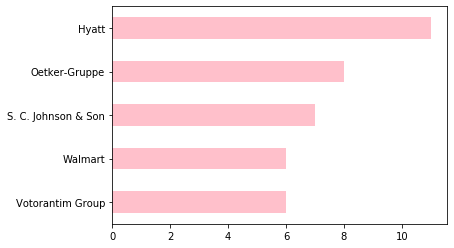

In [14]:
df.company.value_counts().head(5).sort_values().plot(kind='barh', color='pink')
var = df.company.value_counts().head(5).index
var

## 7) How much money do these billionaires have in total?

In [15]:
# those on the chart above

# is there a better way to do this?

total = 0
for each in var:
    total = total + df[df.company ==(each)].networthusbillion.sum()
    
print(round(total))

222.0


In [16]:
## all people listed
round(df.networthusbillion.sum())

6454.0

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [17]:
df.groupby(by='countrycode')\
    .networthusbillion.sum()\
    .sort_values(ascending=False)\
    .head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [18]:
round(df.age.mean())

63.0

In [19]:
round(df.groupby(by='selfmade').age.mean())

selfmade
inherited    65.0
self-made    63.0
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [20]:
df[['age','name']]\
    .sort_values(by='age')\
    .head(10)

,age,name
1172,24.0,Perenna Kei
397,29.0,Dustin Moskovitz
1004,29.0,Mark Zuckerberg
127,29.0,"Anton Kathrein, Jr."
394,30.0,Drew Houston
28,30.0,Albert von Thurn und Taxis
406,31.0,Eduardo Saverin
1340,31.0,Scott Duncan
1607,32.0,Yang Huiyan
991,33.0,Marie Besnier Beauvalot


In [21]:
df[['age','name']]\
    .sort_values(by='age', ascending=False)\
    .head(10)

,age,name
343,98.0,"David Rockefeller, Sr."
816,96.0,Karl Wlaschek
836,96.0,Kirk Kerkorian
588,95.0,Henry Hillman
435,95.0,Erika Pohl-Stroher
1428,94.0,Sulaiman Al Rajhi
122,94.0,Anne Cox Chambers
815,94.0,Karl Albrecht
77,93.0,Aloysio de Andrade Faria
1560,93.0,Wang Yung-Tsai


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4712CAA20>]],
      dtype=object)

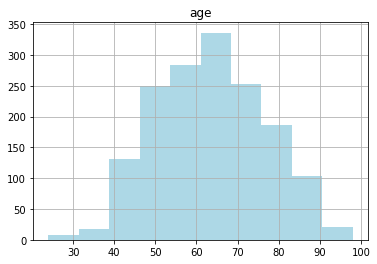

In [43]:
df[['age','name']]\
    .sort_values(by='age')\
    .hist(color='lightblue')

## 11) Make a scatterplot of net worth compared to age

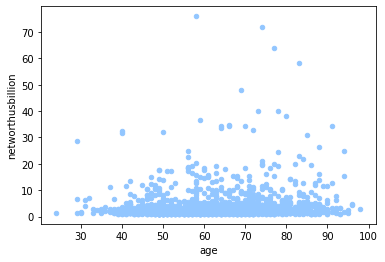

In [23]:
df.plot(x='age', y='networthusbillion', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

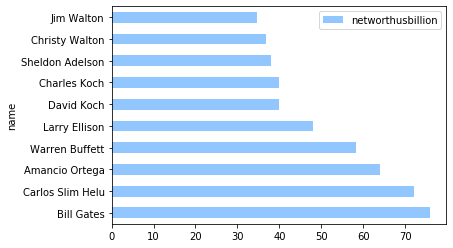

In [40]:
# df.networthusbillion\
#     .sort_values()\
#     .head(10)\
#     .plot(kind='barh', x='name', y='networthusbillion')

df.sort_values(by='networthusbillion', ascending=False).head(10).plot(kind='barh', x='name', y='networthusbillion')